# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [8]:
def conversion(value):
    if value=='Male':
        return 0
    else:
        return 1

In [9]:
df['Gender']=df['Gender'].apply(conversion)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Drop user ID column

In [10]:
df.drop(columns=['User ID'],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

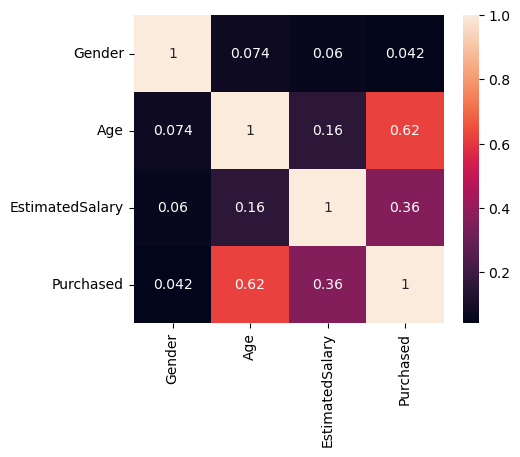

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Plot a countplot of gender with respect to purchased

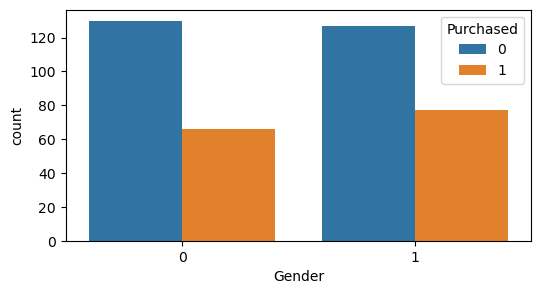

In [12]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='Gender',hue='Purchased')
plt.show()

### Plot a displot of Age

<Figure size 800x400 with 0 Axes>

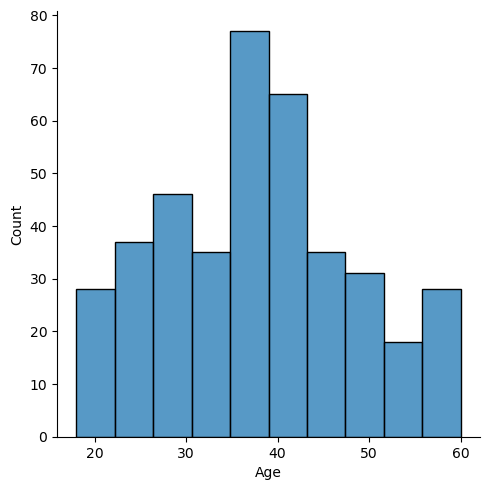

In [13]:
plt.figure(figsize=(8,4))
sns.displot(data=df, x='Age')
plt.show()

### Plot pairplot of the dataset

<Figure size 1000x500 with 0 Axes>

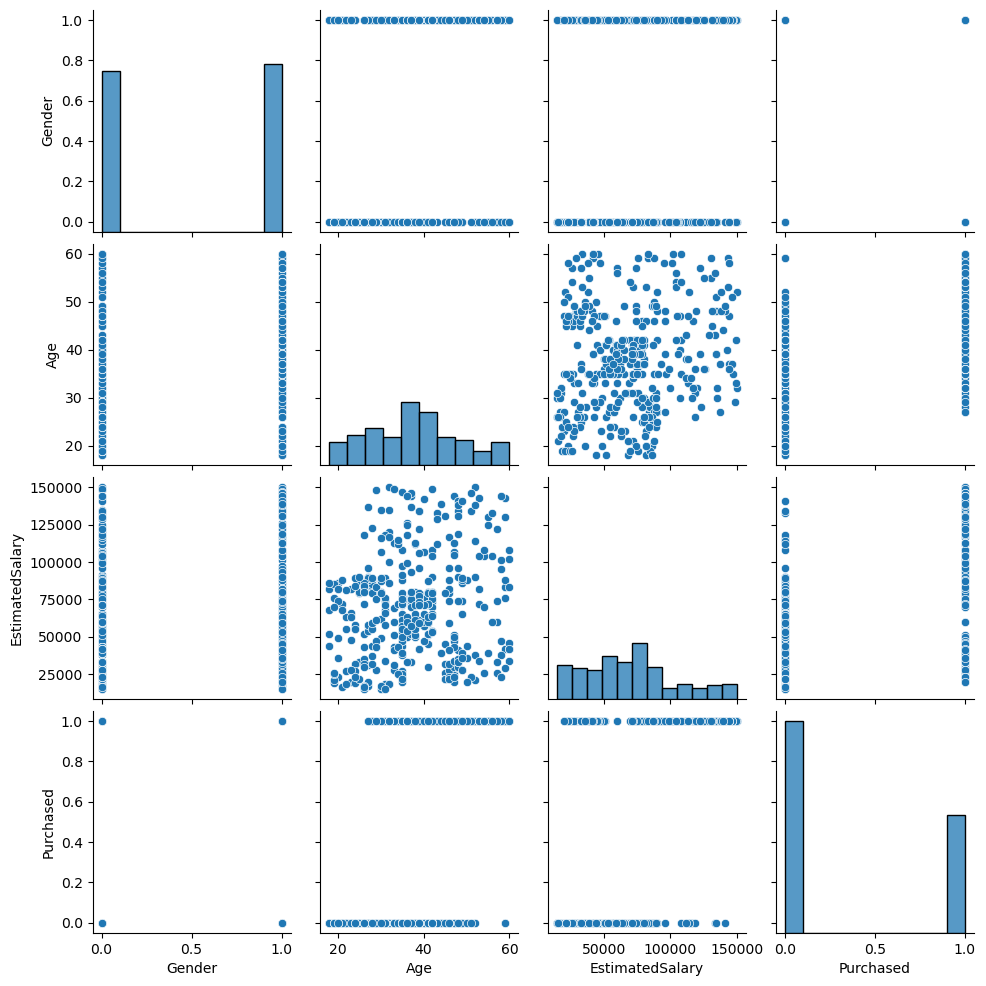

In [14]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.show()

## Data Preprocessing

### Split the dataset into input and target variables

In [15]:
X=df.drop(columns=['Purchased'])
y=df['Purchased']

### Scale the data using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
xcolumns=X.columns

In [19]:
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=xcolumns)

In [20]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### Check shape of X_train and X_test

In [23]:
X_train.shape

(280, 3)

In [24]:
X_test.shape

(120, 3)

## ML Models

### Logistic Regression Classifier

In [25]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [26]:
model_log=LogisticRegression()

In [27]:
model_log.fit(X_train,y_train)

LogisticRegression()

In [28]:
print("Accuracy score of the model is: ",model_log.score(X_train,y_train))

Accuracy score of the model is:  0.8464285714285714


In [29]:
y_pred=model_log.predict(X_test)

In [30]:
print("Accuracy score of our prediction is :",metrics.accuracy_score(y_test,y_pred))

Accuracy score of our prediction is : 0.8333333333333334


In [31]:
print("Confusion matrix is:\n",metrics.confusion_matrix(y_test,y_pred))
print("Classification Report is:\n",metrics.classification_report(y_test,y_pred))

Confusion matrix is:
 [[72  3]
 [17 28]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        75
           1       0.90      0.62      0.74        45

    accuracy                           0.83       120
   macro avg       0.86      0.79      0.81       120
weighted avg       0.84      0.83      0.83       120



In [32]:
score=cross_val_score(model_log,X,y,cv=5)
mean_score_log=score.mean()
print("Mean of cross validation score is: ",mean_score_log)

Mean of cross validation score is:  0.82


### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [34]:
model_ran=RandomForestClassifier(n_estimators=20)

In [35]:
model_ran.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [36]:
print("Score of our trained model is:",model_ran.score(X_train,y_train))

Score of our trained model is: 0.9892857142857143


In [37]:
y_pred=model_ran.predict(X_test)
print("Accuaracy score of our prediction is:",metrics.accuracy_score(y_test,y_pred))

Accuaracy score of our prediction is: 0.9166666666666666


In [38]:
print("Confusion matrix is:\n",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix is:
 [[72  3]
 [ 7 38]]


In [39]:
print("Classification report is:\n",metrics.classification_report(y_test,y_pred))

Classification report is:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        75
           1       0.93      0.84      0.88        45

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



In [40]:
score=cross_val_score(model_ran,X,y,cv=5)
mean_score_ran=score.mean()
print("Mean of Cross validation score is: ",mean_score_ran)

Mean of Cross validation score is:  0.8275


### Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [43]:
print("Score of our trained model is:",model_svc.score(X_train,y_train))

Score of our trained model is: 0.9035714285714286


In [44]:
y_pred=model_svc.predict(X_test)
print("Accuaracy score of our prediction is:",metrics.accuracy_score(y_test,y_pred))

Accuaracy score of our prediction is: 0.925


In [45]:
print("Confusion matrix is:\n",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix is:
 [[72  3]
 [ 6 39]]


In [46]:
print("Classification report is:\n",metrics.classification_report(y_test,y_pred))

Classification report is:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        75
           1       0.93      0.87      0.90        45

    accuracy                           0.93       120
   macro avg       0.93      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



In [47]:
score=cross_val_score(model_svc,X,y,cv=5)
mean_score_sv=score.mean()
print("Mean of Cross validation score is: ",mean_score_sv)

Mean of Cross validation score is:  0.9


### Assign cross val scores of all models into a dataframe

In [48]:
data={
    'Model':['Support Vector Machine','Random Forest','Logistic Regression'],
    'Scores':[mean_score_sv,mean_score_ran,mean_score_log]
}
cv=pd.DataFrame(data)
cv

,Model,Scores
0,Support Vector Machine,0.9000
1,Random Forest,0.8275
2,Logistic Regression,0.8200


***

## Deploy the model with highest score using Tkinter

In [49]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [50]:
from tkinter import *

### Define a function that will output to an entry box in Tkinter

In [51]:
def get_prediction():  
    try:
        #to retrieve the data
        gender_input = gender_var.get()  
        age_input = float(age_entry.get())  
        salary_input = float(salary_entry.get()) 

        user_input = scaler.transform([[gender_input, age_input, salary_input]])

        prediction = model_svc.predict(user_input)

        if prediction[0] == 1:
            resultbox.delete(0, END)#used to clear the current contents of the resultbox widget
            resultbox.insert(0, "Purchased")
        else:
            resultbox.delete(0, END)
            resultbox.insert(0, "Not Purchased")

    except Exception as e:
        resultbox.delete(0, END)
        resultbox.insert(0, f"Error: {str(e)}")
        #str(e) - Converts the exception object e into a string that contains the error message
        #This object cannot be directly inserted into a text field like resultbox, as it is not a string

### Create Tkinter window with all necessary entryboxes and labels

In [52]:
root = Tk()
root.title("Customer Behaviour Prediction")

''

In [53]:
gender_label = Label(root, text="Gender:")
gender_label.grid(row=0, column=0, sticky=W, padx=5, pady=5)

#IntVar: A variable that holds integer values
gender_var = IntVar()#The variable will update automatically when a radio button is clicked

male_radio = Radiobutton(root, text="Male", variable=gender_var, value=0)
male_radio.grid(row=0, column=1, padx=5, pady=5)

female_radio = Radiobutton(root, text="Female", variable=gender_var, value=1)
female_radio.grid(row=0, column=2, padx=5, pady=5)

In [54]:
age_label = Label(root, text="Age:")
age_label.grid(row=1, column=0, sticky=W, padx=5, pady=5)

age_entry = Entry(root)
age_entry.grid(row=1, column=1, columnspan=2, padx=5, pady=5)

In [55]:
salary_label = Label(root, text="Estimated Salary:")
salary_label.grid(row=2, column=0, sticky=W, padx=5, pady=5)

salary_entry = Entry(root)
salary_entry.grid(row=2, column=1, columnspan=2, padx=5, pady=5)

In [56]:
predict_button = Button(root, text="Predict", command=get_prediction)
predict_button.grid(row=3, column=0, columnspan=3, pady=10)

In [ ]:
resultbox = Entry(root)
resultbox.grid(row=4, column=0, columnspan=3, padx=5, pady=5)

root.mainloop()

2024-11-26 14:19:43.716 python[5895:116075] +[IMKClient subclass]: chose IMKClient_Modern
2024-11-26 14:19:43.716 python[5895:116075] +[IMKInputSession subclass]: chose IMKInputSession_Modern


***